In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/joined.csv", delimiter=",").astype(np.float32)
eeg_data.shape

(12, 170752)

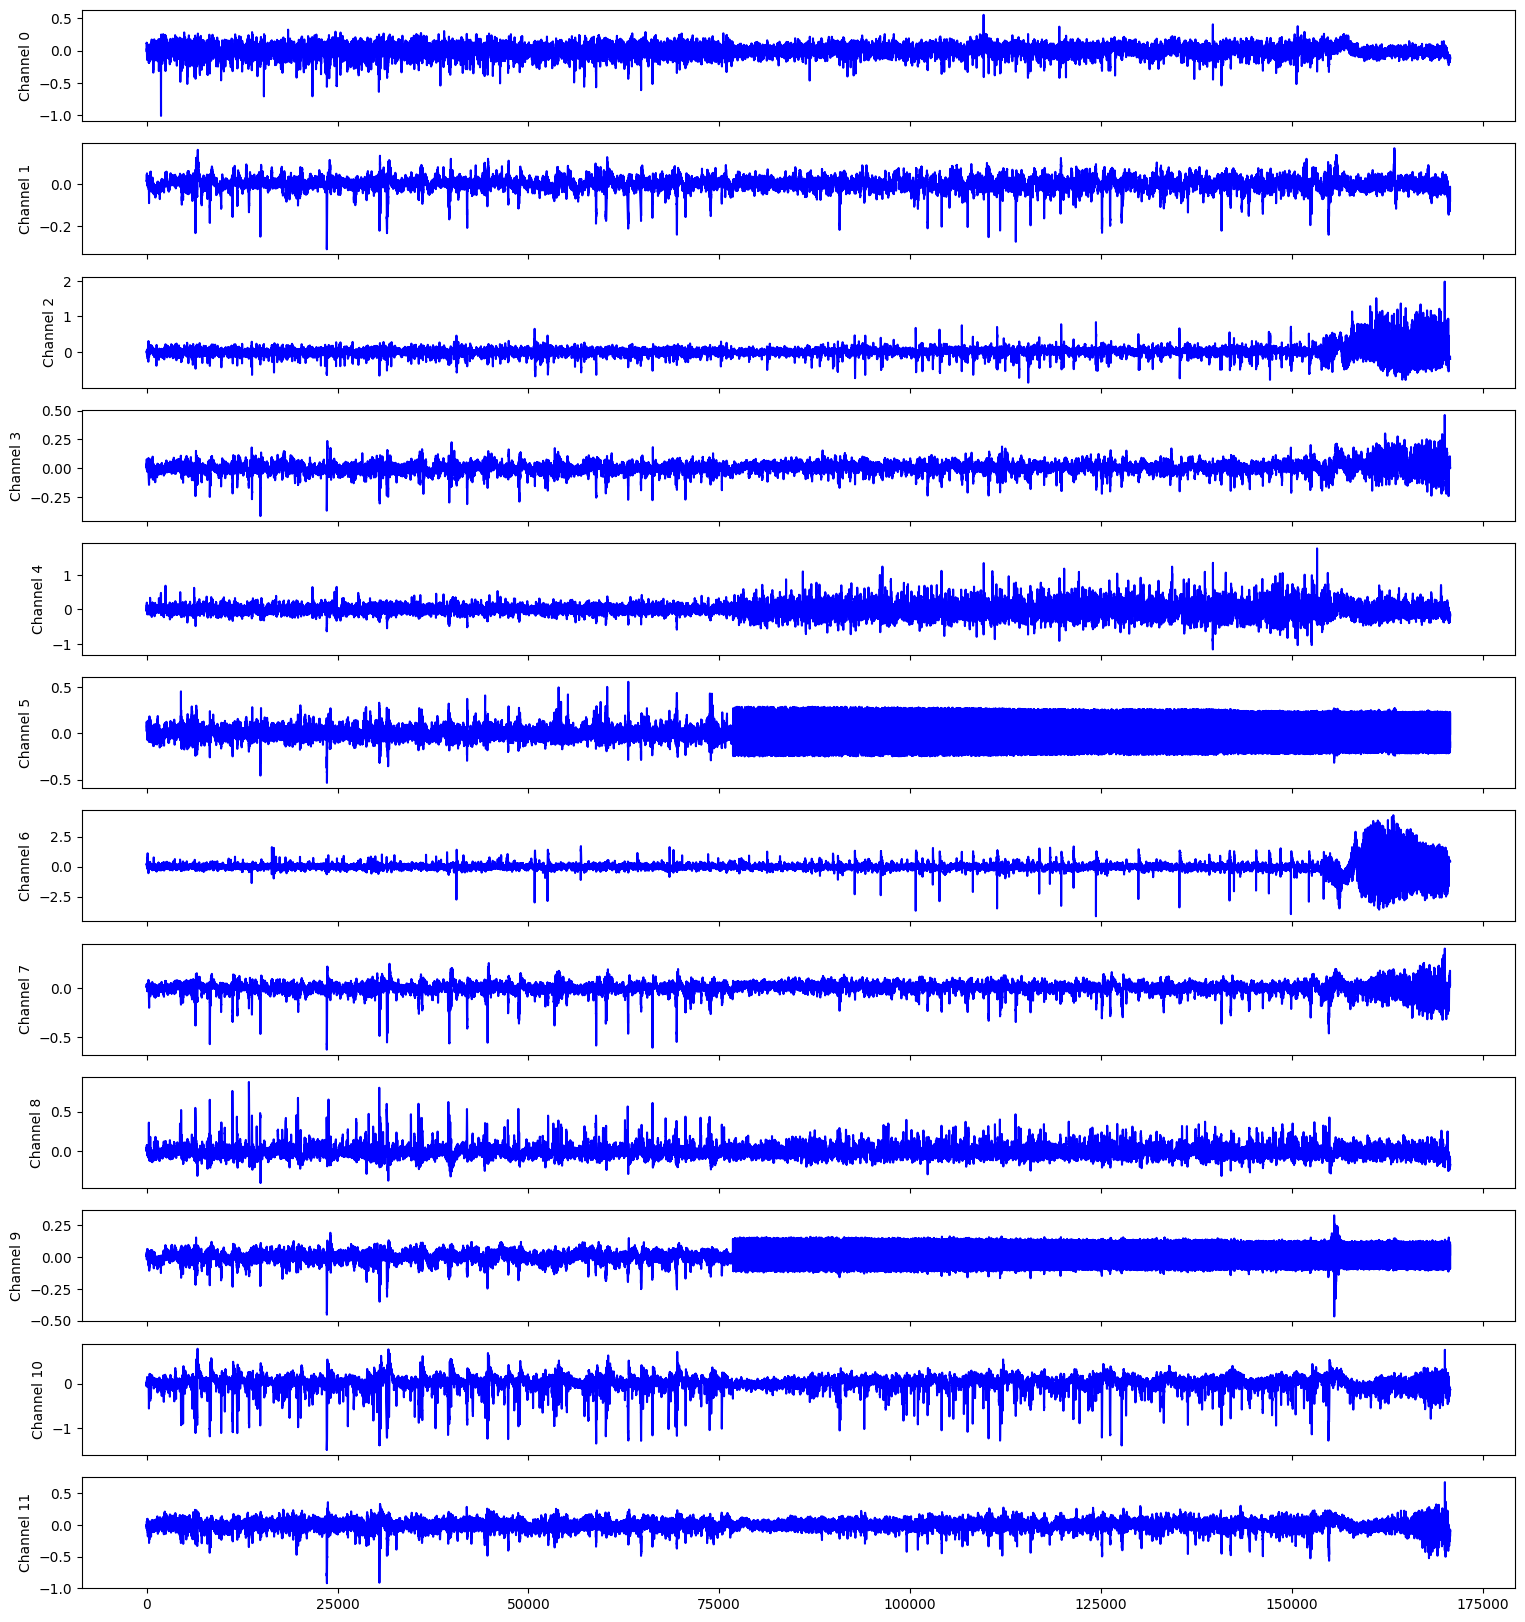

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [3]:
import pandas as pd

# convert to df
df = pd.DataFrame(eeg_data.T, columns=[f"channel_{i}" for i in range(12)] )

df.shape

(170752, 12)

In [10]:
from importlib import reload
import CPD.benchmark
import CPD.benchwarm

reload(CPD.benchwarm)
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [11]:
arpwarm = CPD.benchwarm.ARPWarm(df, n0=10, M=5, k=4)
arpwarm.warmup()

KeyboardInterrupt: 

In [12]:
cpd = CPD.benchmark.Online(arpwarm)
change_point = cpd.run()

print(f"change point detected at t={change_point}")

STEP 10
channel_5: 
Alles ist gut
channel_8: 
Alles ist gut
channel_3: 
Alles ist gut
channel_10: 
Alles ist gut
channel_6: 
Alles ist gut
channel_1: 
Alles ist gut
channel_7: 
Alles ist gut
channel_11: 
Alles ist gut
channel_4: 
Alles ist gut
channel_0: 
Alles ist gut
channel_2: 
Alles ist gut
channel_9: 
Alles ist gut
STEP 11
channel_5: 
Alles ist gut
channel_8: 
Alles ist gut
channel_3: 
Alles ist gut
channel_10: 
channel_10 Rejection incremented
channel_6: 
Alles ist gut
channel_1: 
Alles ist gut
channel_7: 
Alles ist gut
channel_11: 
Alles ist gut
channel_4: 
Alles ist gut
channel_0: 
Alles ist gut
channel_2: 
channel_2 Rejection incremented
channel_9: 
Alles ist gut
STEP 12
channel_5: 
Alles ist gut
channel_8: 
Alles ist gut
channel_3: 
Alles ist gut
channel_10: 
Alles ist gut
channel_6: 
Alles ist gut
channel_1: 
Alles ist gut
channel_7: 
Alles ist gut
channel_11: 
Alles ist gut
channel_4: 
Alles ist gut
channel_0: 
Alles ist gut
channel_2: 
channel_2 Rejection incremented
chann

c:\Users\saidmf\anaconda3\envs\tsa\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\saidmf\anaconda3\envs\tsa\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].axvline(x=change_point, c='r')
    axs[c].set_ylabel(f"Channel {c}")

Utilize the online version of the algorithm to tune your hyperparameters.